In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_excel('data.xlsx')

### 1. Data Preliminary analysis:
1 Perform preliminary data inspection and report the findings as the structure of the data,
  missing values, duplicates etc.
2 Based on the findings from the previous questions identify duplicates and remove them.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [46]:
data.isna().sum(axis=0)

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### 2. Clean variable names

In [47]:
data.columns = data.columns.str.replace(' ','_')

#### 2.1 values given as 0 are missing

In [48]:
(data == 0).sum()

Restaurant_ID              0
Restaurant_Name            0
Country_Code               0
City                       0
Address                    0
Locality                   0
Locality_Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average_Cost_for_two      18
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Price_range                0
Aggregate_rating        2148
Rating_color               0
Rating_text                0
Votes                   1094
dtype: int64

### 3. Missing values for Latitude and Longitude

In [49]:
missing_city = data[(data.Longitude ==0)|(data.Latitude == 0) ].City.unique()
len(missing_city)

28

### 4. fill in Missing using the city names

In [50]:
lat_n_long = data.groupby('City').agg('mean')[['Latitude','Longitude']].loc[missing_city]
missing_city_loc = {x:tuple(lat_n_long.loc[x]) for x in missing_city}
((data.Latitude == 0) | (data.Longitude == 0)).sum()

499

In [51]:
len(lat_n_long)

28

In [52]:
for i in data.index:
    if (data.loc[i,'Latitude'] == 0) or (data.loc[i , 'Longitude'] == 0):
        city = data.loc[i , 'City']
        lat, long = missing_city_loc[city]
        data.loc[i,'Latitude'] = lat
        data.loc[i,'Longitude'] = long

### 5. duplicates

In [53]:
print('Any Duplicated Rows ? :' , data.duplicated().any())
print('No. of Duplicated Rows :', data.duplicated().sum())

Any Duplicated Rows ? : False
No. of Duplicated Rows : 0


In [54]:
data.duplicated('Restaurant_ID').any()

False

In [55]:
print('No. of unique Restaurant_IDs :', data.Restaurant_ID.nunique())
print('No. of unique Restaurant_Names :', data.Restaurant_Name.nunique())

No. of unique Restaurant_IDs : 9551
No. of unique Restaurant_Names : 7445


Above data provides information that the restaurant ids are unique however there is an overlap
in Restaurant names

#### 5.1 Geographical distribution

In [56]:
country_code = pd.read_excel('Country-Code.xlsx')
country_code.columns = country_code.columns.str.replace(' ','_')

In [57]:
data = pd.merge(data,country_code, on = 'Country_Code')

#### 5.2 Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants.

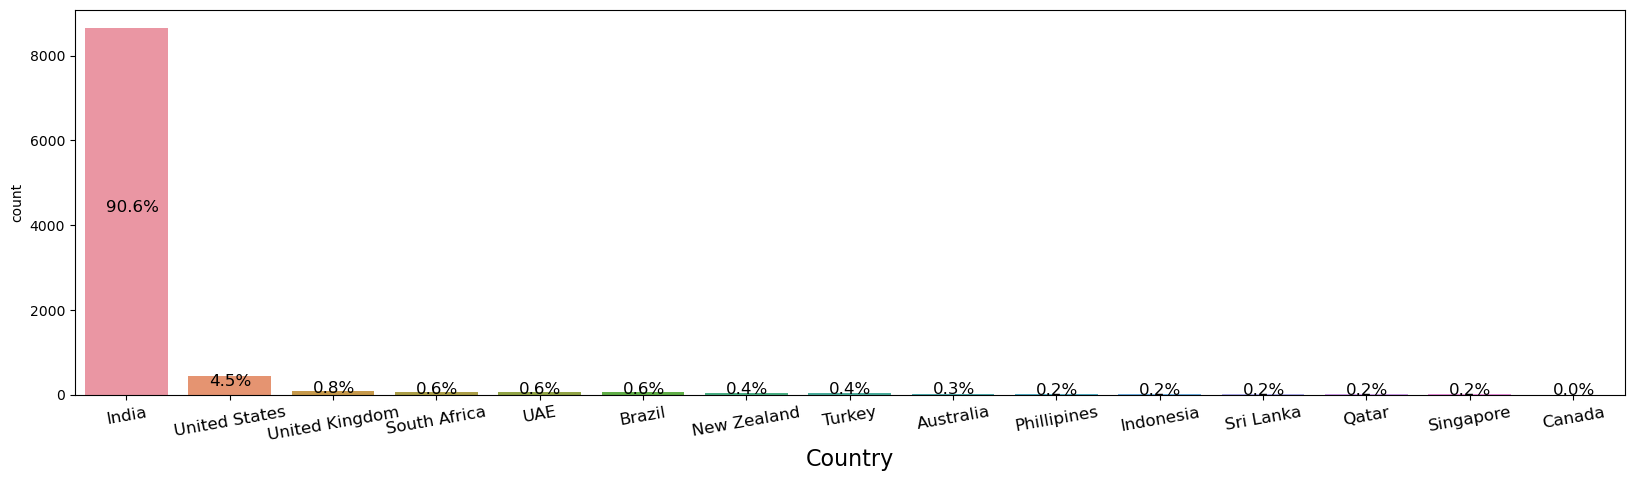

In [58]:
plt.figure(figsize = (20,5))
vc = pd.DataFrame(data.Country.value_counts()).rename({'Country':'Freq'}, axis= 1)
vc['Perc'] = (vc.Freq/vc.Freq.sum()*100).round(1)
sns.countplot(x = 'Country', data = data, order = vc.index)
for i in range(len(vc)):
    plt.annotate(str(vc.Perc[i]) +'%', xy = (i -0.2, int(vc.Freq[i]/2)),fontsize = 12)
plt.xticks(size = 12, rotation = 10)
plt.xlabel('Country',size = 16)
plt.show()


In [59]:
import warnings
warnings.filterwarnings('ignore')

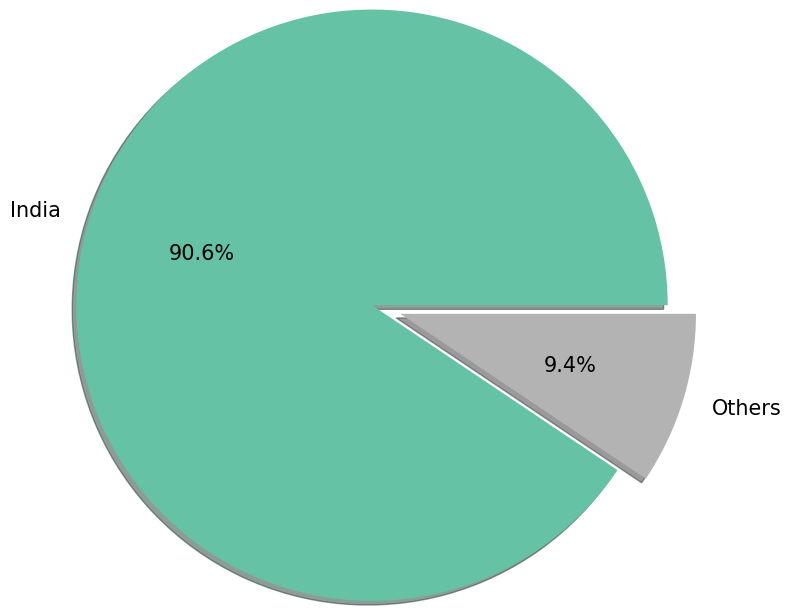

In [60]:
vc = pd.Series()
vc['India'] = len(data[data.Country == 'India'])
vc['Others'] = len(data[data.Country != 'India'])
vc.plot.pie(radius = 2,autopct = '%1.1f%%' , textprops = {'size':15 }, explode= [0.1,0.1], shadow = True, cmap ='Set2')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.show()

Quick Inferences - * Zomato’s largest market is in India itself, nobody even comes close. * Analysing
data from India should give us a pretty accurate representation of the entire data. * One important
thing that might vary across different regions is the types of Cusinies. So it should be interesting
to see how many cusinies are served throughout the world.

In [61]:
data = data[data.Country == 'India']

### 6. Explore how ratings are distributed overall.

In [62]:
data['Rating_cat'] = data['Aggregate_rating'].round(0).astype(int)

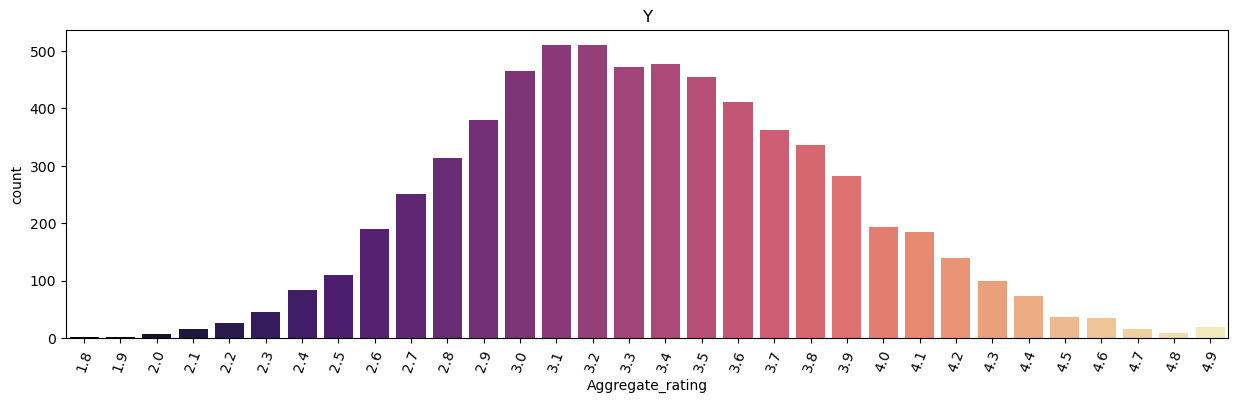

In [63]:
plt.figure( figsize = (15, 4))
sns.countplot('Aggregate_rating', data = data[data.Aggregate_rating !=0], palette = 'magma')
plt.tick_params('x', rotation = 70)
plt.title('Y')
plt.show()

In [64]:
data["Rating_color"].value_counts()
Color_represents = data.groupby(['Rating_color'],as_index =False)['Aggregate_rating'].mean()

In [65]:
Color_represents.columns = ['Rating_color','Average_rating']

In [66]:
Color_represents =Color_represents.sort_values(by='Average_rating',ascending=False)

In [67]:
Color_represents = Color_represents[0:5]
Color_represents['Ratings'] = ['Excellent','Very Good','Good','Okay','Poor']

In [68]:
Color_represents

,Rating_color,Average_rating,Ratings
0,Dark Green,4.646552,Excellent
1,Green,4.153324,Very Good
5,Yellow,3.677423,Good
2,Orange,3.048722,Okay
3,Red,2.296111,Poor


### 7. Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.

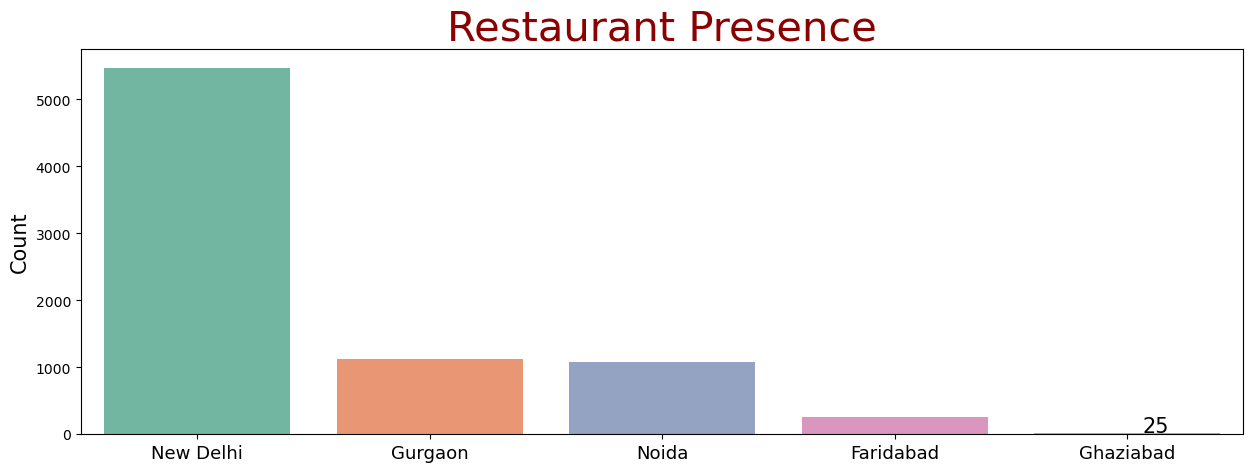

In [69]:
plt.figure(figsize = (15,5))
vc = data.City.value_counts()[:5]
g = sns.barplot(x = vc.index, y = vc.values, palette = 'Set2')
g.set_xticklabels(g.get_xticklabels(),fontsize = 13)
for i in range(5):
    value = vc[i]
g.text(y = value - 2,x = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_ylabel('Count', fontsize = 15)
g.set_title('Restaurant Presence', fontsize = 30, color = 'darkred')
plt.show()

Here we can see that New Delhi has most no. of restaurants ,gurgaon,noida and Faridabad are
behind it but by very huge margin,and other cities like Ahmedabad ,Amritsar,Bhubaneshwar have
least no. of restaurants.It is a noticable point that there is not even a single city outside india to
be in top 10 in no. of restaurants.

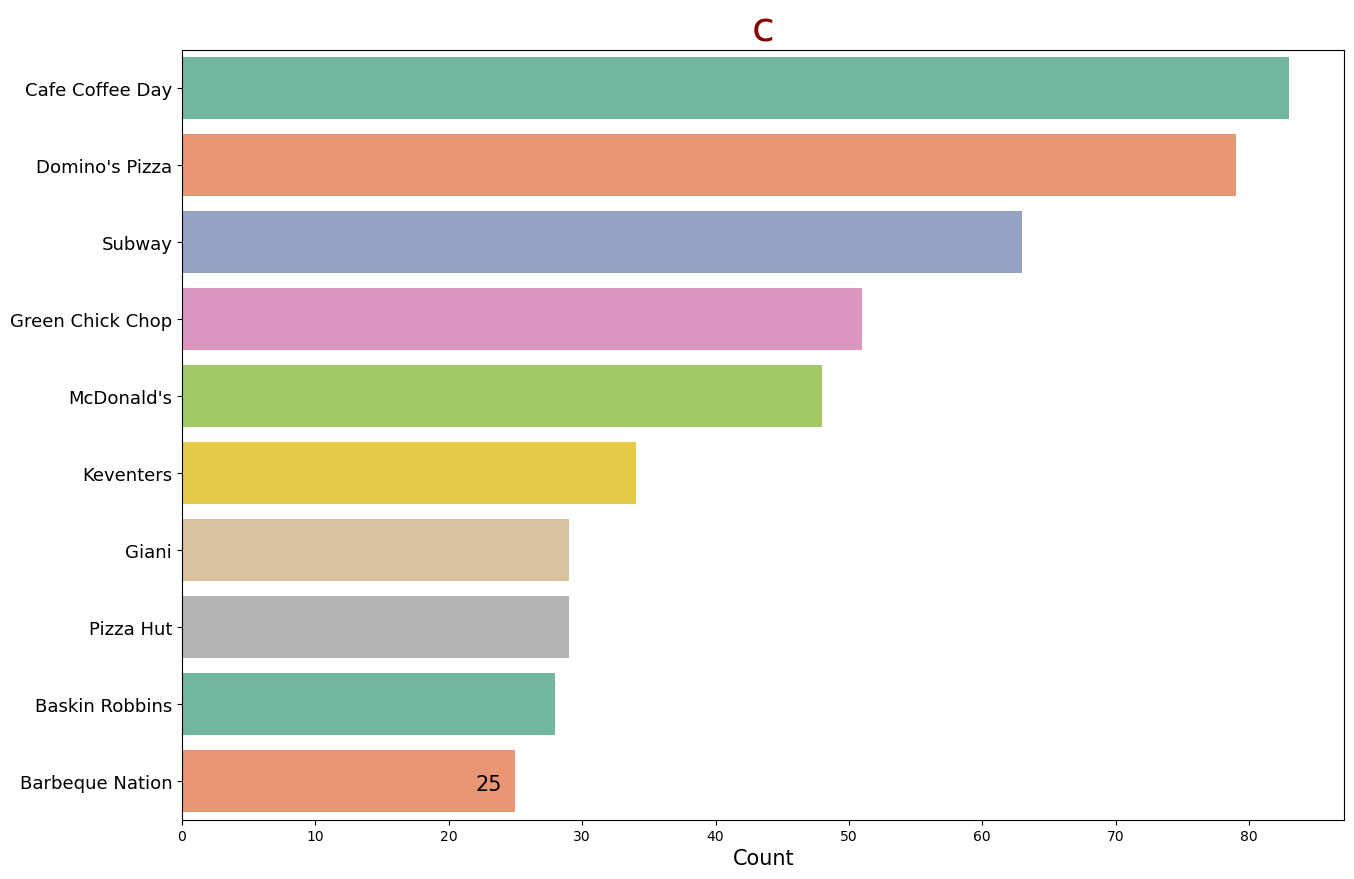

In [70]:
plt.figure(figsize = (15,10))
vc = data.Restaurant_Name.value_counts()[:10]
g = sns.barplot(y = vc.index, x = vc.values, palette = 'Set2')
g.set_yticklabels(g.get_yticklabels(),fontsize = 13)
for i in range(10):
    value = vc[i]
g.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_xlabel('Count', fontsize = 15)
g.set_title('c', fontsize = 30, color = 'darkred')
plt.show()

### 7.1 What is the ratio between restaurants that allow table booking vs that do not allow table booking? 
### 7.2 What is the percentage of restaurants providing online delivery?

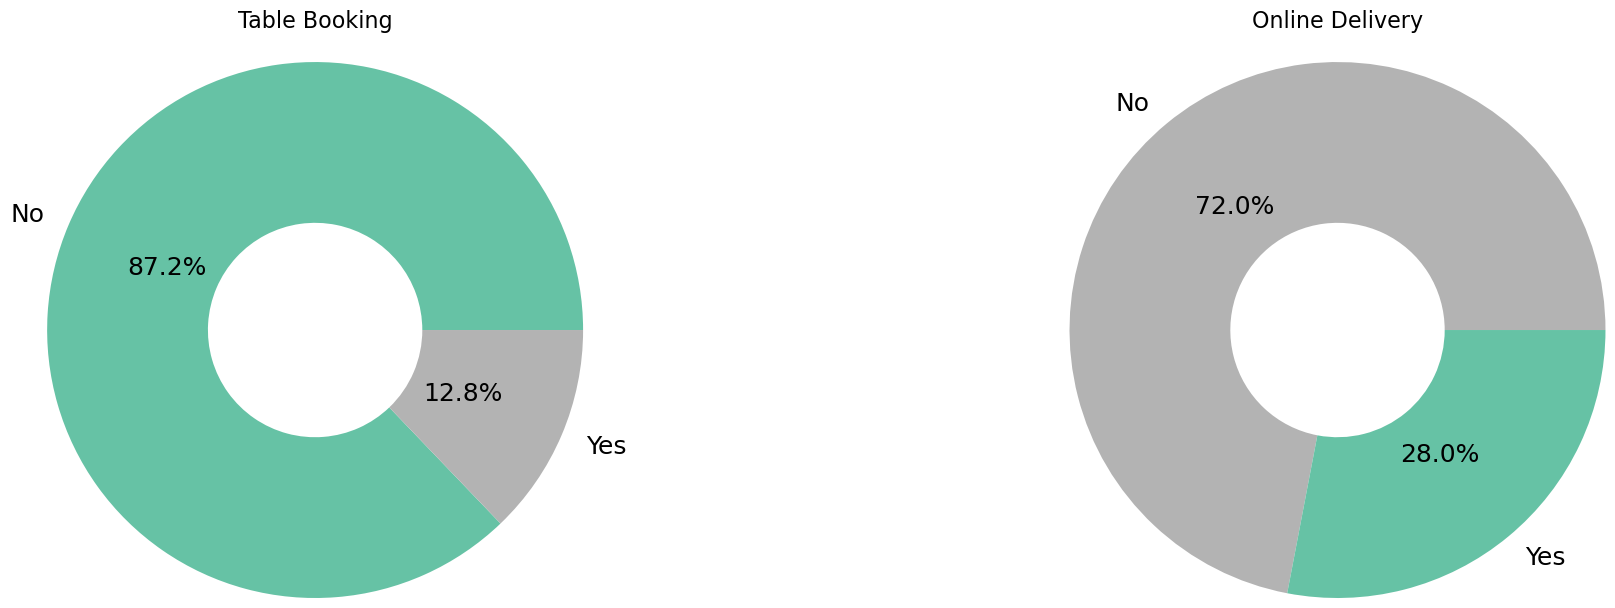

In [71]:
f,axes = plt.subplots(1,2,figsize = (20,7))
data.Has_Table_booking.value_counts().plot.pie(ax = axes[0],autopct = '%0.1f%%', radius = 1.25, wedgeprops = {'width' : 0.75}, cmap = 'Set2',
textprops = {'size' : 18,} )
#axes[0].set_xticklabels(labels = axes[0].get_xticklabels(),rotation = 0)
axes[0].set_title('Table Booking\n',fontsize = 16)
axes[0].set_ylabel('')
data.Has_Online_delivery.value_counts().plot.pie(ax = axes[1], autopct = '%0.1f%%', radius = 1.25,wedgeprops = {'width' : 0.75}, cmap = 'Set2_r',
textprops = {'size' : 18} )
axes[1].set_title('Online Delivery\n', fontsize = 16)
#axes[1].set_xticklabels(labels = axes[1].get_xticklabels(),rotation = 0)
axes[1].set_ylabel('')
plt.tight_layout(w_pad = 20, h_pad = 10, pad = 4)
plt.show()

In [72]:
pd.crosstab(data.Has_Online_delivery,data.Has_Table_booking)

Has_Table_booking,No,Yes
Has_Online_delivery,,
No,5545,684
Yes,1996,427


### 7.3 Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

<AxesSubplot:xlabel='Aggregate_rating'>

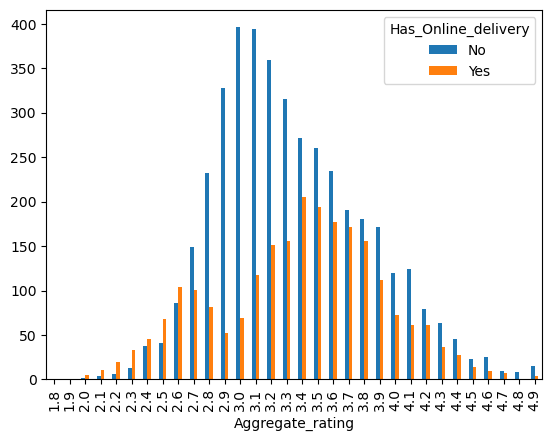

In [74]:
d = data[data.Aggregate_rating != 0]
pd.crosstab(d.Aggregate_rating, d.Has_Online_delivery).plot.bar()

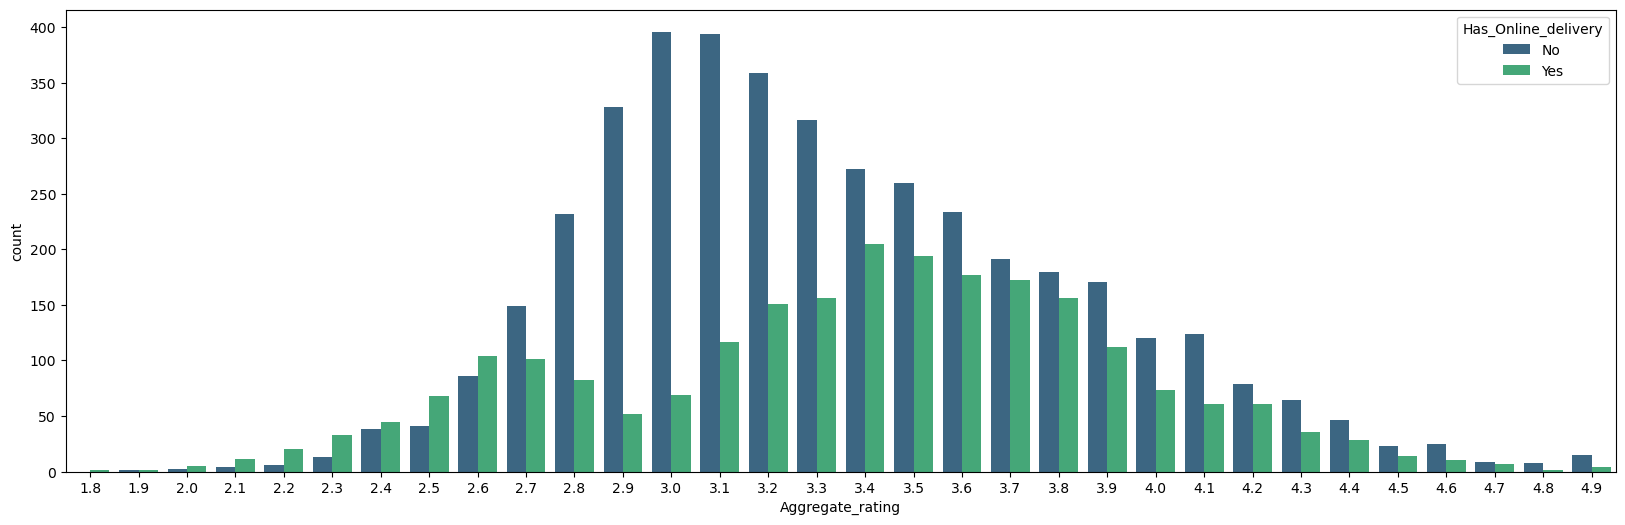

In [75]:
plt.figure(figsize=(20,6))
sns.countplot(data=data[data.Aggregate_rating !=0],x='Aggregate_rating',hue='Has_Online_delivery',palette='viridis')
plt.show()

### 7.4 Restaurants across city

In [76]:
top10 = data.City.value_counts()[:10]
top10[:2]

New Delhi    5473
Gurgaon      1118
Name: City, dtype: int64

## 8. What are the top 10 cuisines served across cities?

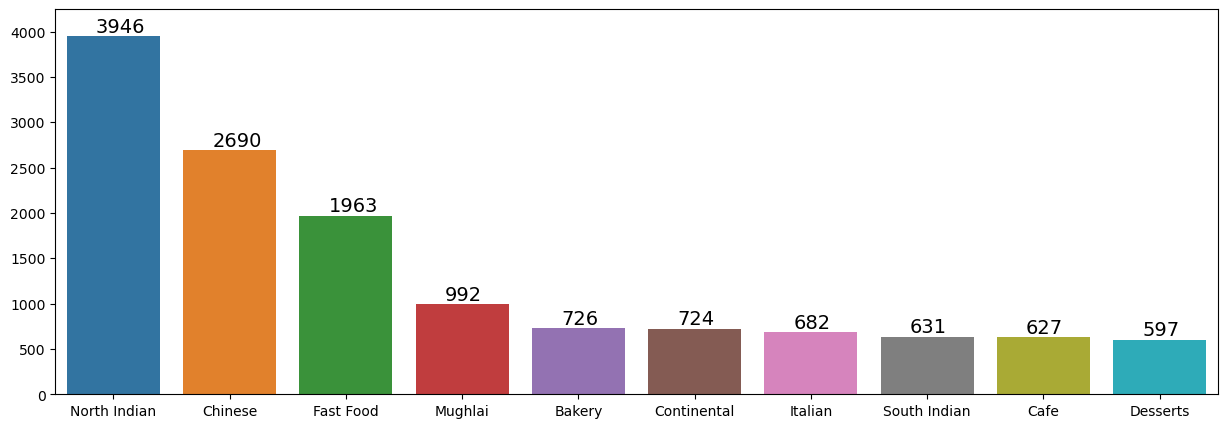

In [85]:
plt.figure(figsize = (15,5))
sns.barplot(x = s.value_counts()[:10].index, y = s.value_counts()[:10] )
for i in range(10):
    plt.annotate(s.value_counts()[i], xy = (i-0.15,s.value_counts()[i]+50),fontsize = 14)
plt.ylim(0, round(s.value_counts()[0]+300))
plt.show()

## 9. What is the maximum and minimum no. of cuisines that a restaurant serves? Also,what is the relationship between No. of cuisines served and Ratings

In [86]:
data['no_cuisines'] = data.Cuisines.str.split(',').apply(len)

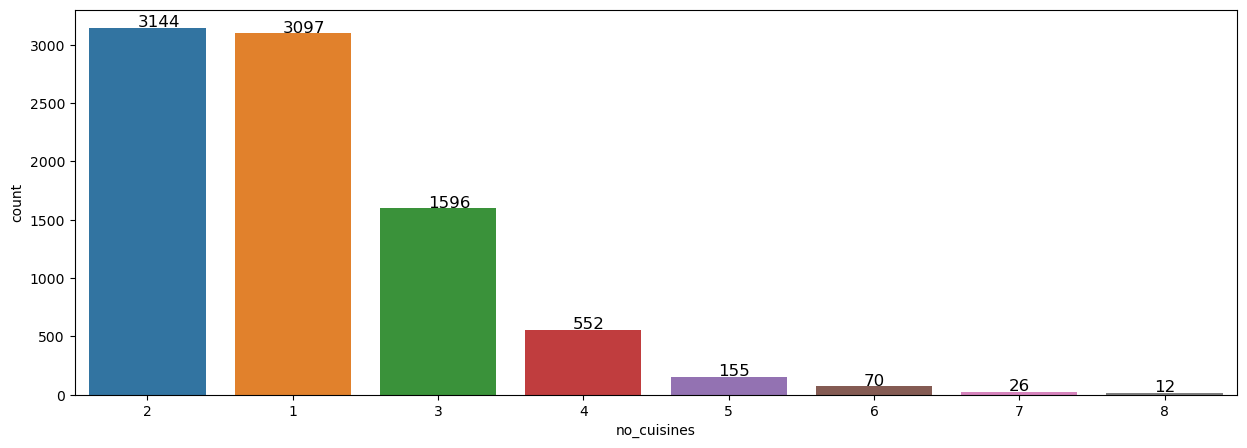

In [87]:
plt.figure(figsize = (15,5))
vc = data.no_cuisines.value_counts()
sns.countplot('no_cuisines', data=data, order = vc.index)
for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy = (i-0.07,vc.iloc[i]+10), fontsize = 12)
plt.show()

## 10. No of Cuisines vs Rating

In [88]:
data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country', 'Rating_cat',
       'no_cuisines'],
      dtype='object')

Text(0.5, 1.0, 'Cuisine _ Rating')

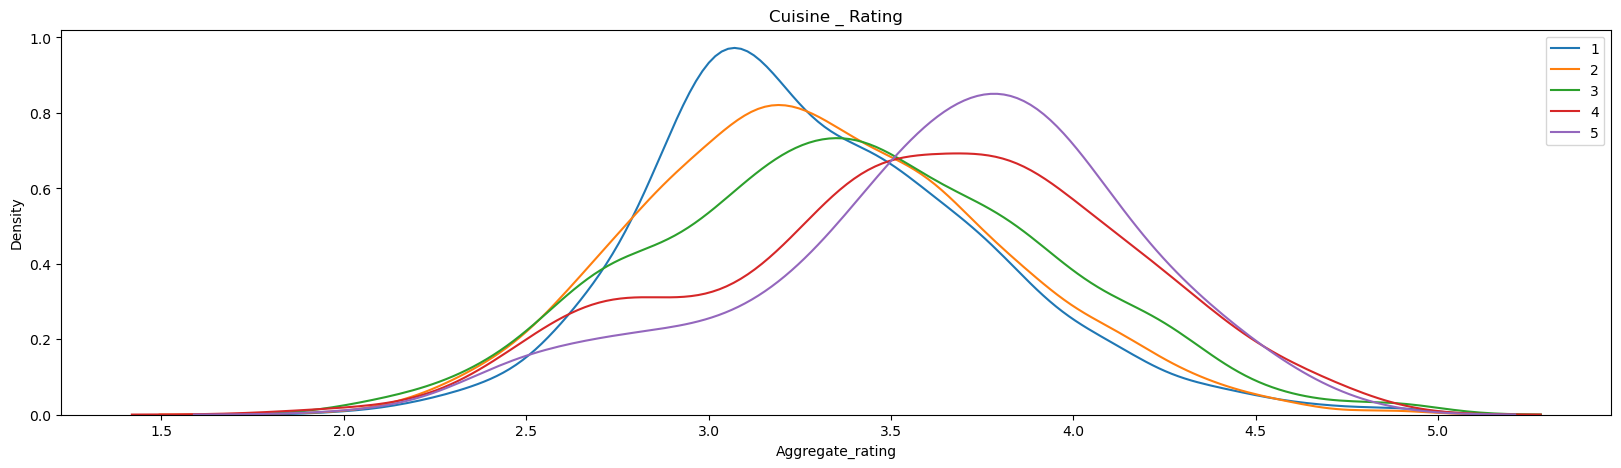

In [90]:
plt.figure(figsize = (20,5))
fusion_rate = data.loc[data.Aggregate_rating >0,['no_cuisines', 'Rating_cat','Aggregate_rating']].copy()
fusion_rate.loc[fusion_rate['no_cuisines'] > 5,'no_cuisines'] = 5
fusion_rate = fusion_rate.loc[fusion_rate.Aggregate_rating != -1, :]
pal = sns.color_palette('Oranges', 11)
for i in range(1,6):
    num_ix = fusion_rate['no_cuisines'] == i
    sns.distplot(fusion_rate.loc[num_ix, 'Aggregate_rating'], label =str(i), hist = False)
    plt.legend()
    plt.title('Rating Distribution for fusion_number')
plt.title('Cuisine _ Rating')

## 10.1 ”More Number of Cusine, Higer Rate Restaruant.”
Cuisine is a complex variables. It contains two types, Country and Kind of Food. I maybe have to
divide them into two variables, country_cu/kind_cu. Most of restaraunt provided under 4 cusine,
but More Number of Cusine, Higer Rate Restaruant  
• the maximum no of cuisines served by a single restaurant is 8  
• most of the restaurant are serving atleast 2 or 1 cuisine  

## 11. Discuss the cost vs the other variables

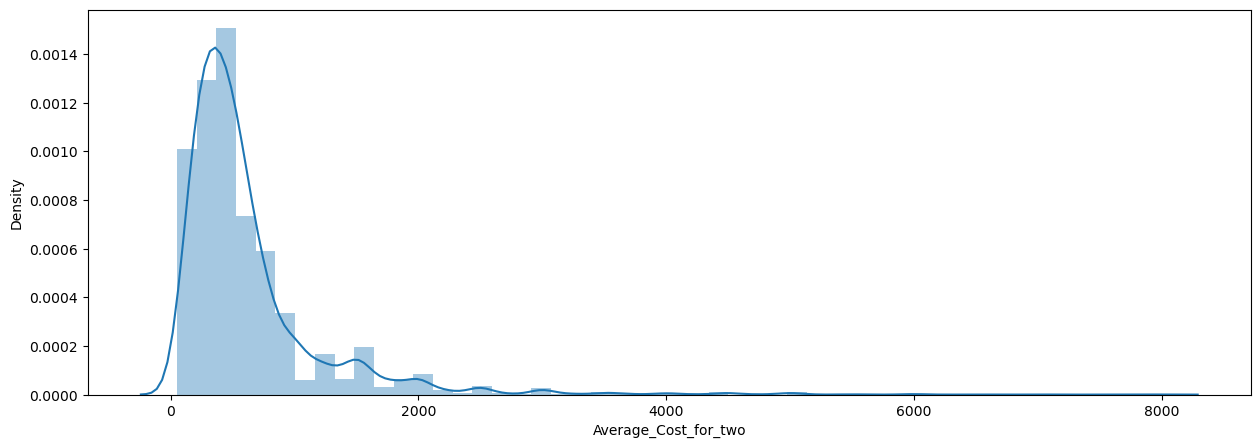

In [91]:
plt.figure(figsize = (15,5))
sns.distplot(data[data.Average_Cost_for_two != 0].Average_Cost_for_two)
plt.show()

## 12. Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.

In [92]:
data['Average_Cost_for_two_cat']= pd.cut(data[data.Average_Cost_for_two != 0].Average_Cost_for_two,
bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000],
labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'no␣limit'])

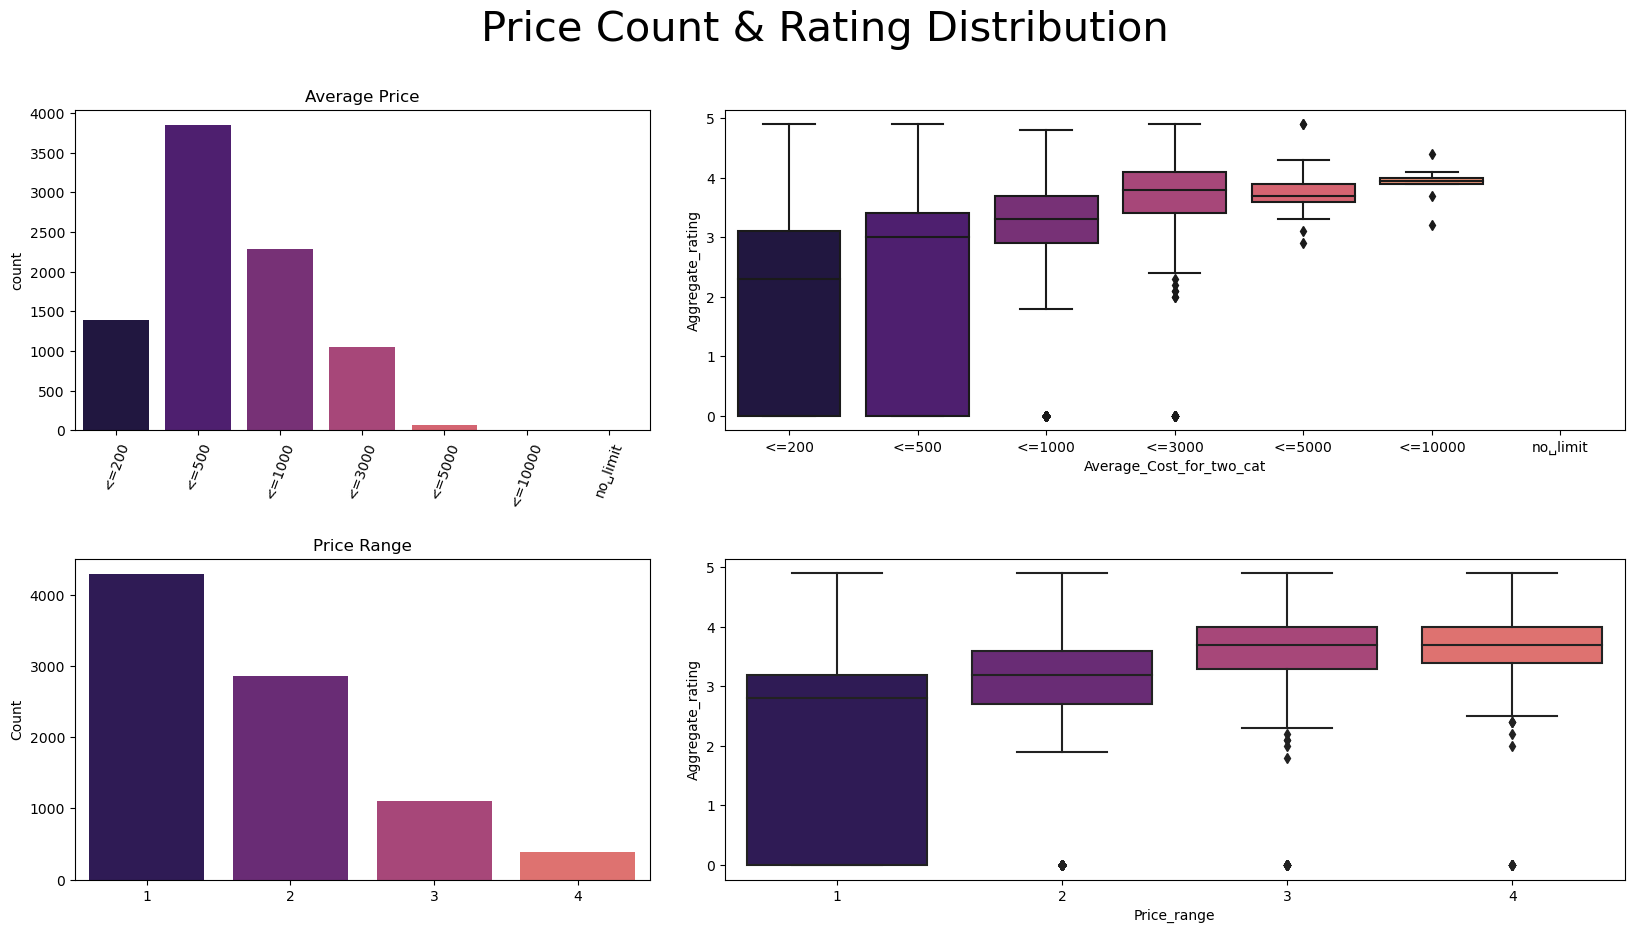

In [94]:
f = plt.figure(figsize = (20,10))
ax = plt.subplot2grid((2,5), (0,0),colspan = 2)
sns.countplot(data['Average_Cost_for_two_cat'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Average Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((2,5), (0,2), colspan = 3)
sns.boxplot(x = 'Average_Cost_for_two_cat', y = 'Aggregate_rating', data =data, ax = ax, palette = sns.color_palette('magma', 7))
count = data['Price_range'].value_counts().reset_index()
count.columns = ['Price_range', 'Count']
ax = plt.subplot2grid((2,5), (1,0),colspan = 2)
sns.barplot(x = 'Price_range', y = 'Count', data = count, ax=ax, palette = sns.color_palette('magma', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((2,5), (1,2), colspan = 3)
sns.boxplot(x='Price_range', y ='Aggregate_rating', data = data, ax = ax,palette = sns.color_palette('magma', 5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.4,)
plt.suptitle('Price Count & Rating Distribution', size = 30)
plt.show()

## 12.1 Aggregate Rating vs Votes

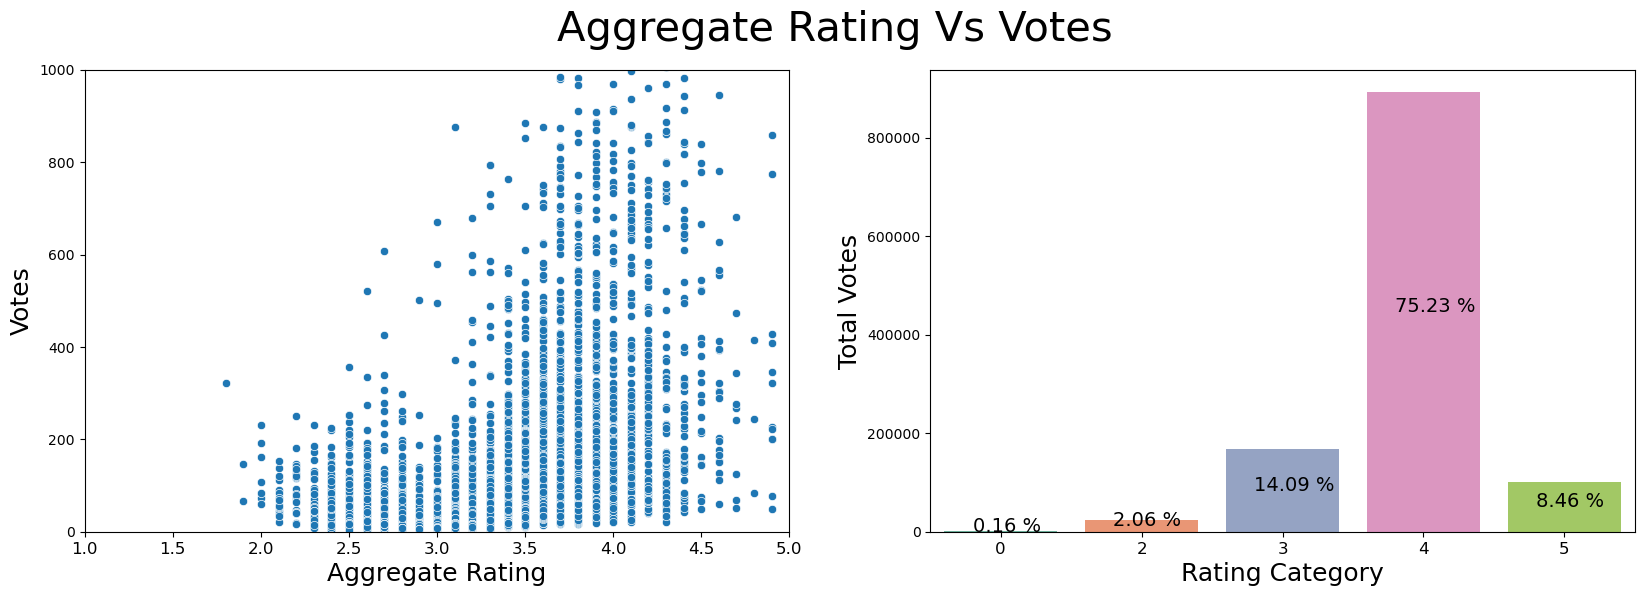

In [95]:
f,ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data=data,x='Aggregate_rating',y='Votes', ax = ax[0], palette ='Set2')
agg = data.pivot_table(index = 'Rating_cat', values = 'Votes', aggfunc = 'sum').reset_index()
agg['Perc_votes']= (agg.Votes/agg.Votes.sum()*100).round(2)
sns.barplot(x = 'Rating_cat', y = 'Votes', data = agg, ax = ax[1], palette='Set2')
for i in range(len(agg)):
    ax[1].annotate(str(agg.Perc_votes[i])+' %', xy = (i-0.2,int(agg.Votes[i]/2)), fontsize = 14, fontweight = 'medium')
ax[0].set_ylim(0,1000)
ax[0].set_xlim(1,5)
ax[0].set_ylabel('Votes',fontsize = 18 )
ax[0].set_xlabel('Aggregate Rating',fontsize = 18 )
ax[0].set_xticklabels(ax[0].get_xticks(),fontsize = 12)
ax[1].set_ylabel('Total Votes',fontsize = 18 )
ax[1].set_xlabel('Rating Category',fontsize = 18 )
ax[1].set_xticklabels(agg.Rating_cat,fontsize = 12)
plt.suptitle('Aggregate Rating Vs Votes', size = 30)
plt.show()